=== Email Spam Classification Experiment ===
Sri Sivasubramaniya Nadar College of Engineering
M.Tech (Integrated) Computer Science & Engineering
Subject: Machine Learning Algorithms Laboratory

1. Loading and Preprocessing Dataset...
Dataset loaded successfully! Shape: (4601, 58)
Dataset shape: (4601, 58)

First few rows:
   word_freq_0  word_freq_1  word_freq_2  word_freq_3  word_freq_4  \
0         0.00         0.64         0.64          0.0         0.32   
1         0.21         0.28         0.50          0.0         0.14   
2         0.06         0.00         0.71          0.0         1.23   
3         0.00         0.00         0.00          0.0         0.63   
4         0.00         0.00         0.00          0.0         0.63   

   word_freq_5  word_freq_6  word_freq_7  word_freq_8  word_freq_9  ...  \
0         0.00         0.00         0.00         0.00         0.00  ...   
1         0.28         0.21         0.07         0.00         0.94  ...   
2         0.19         0.19   

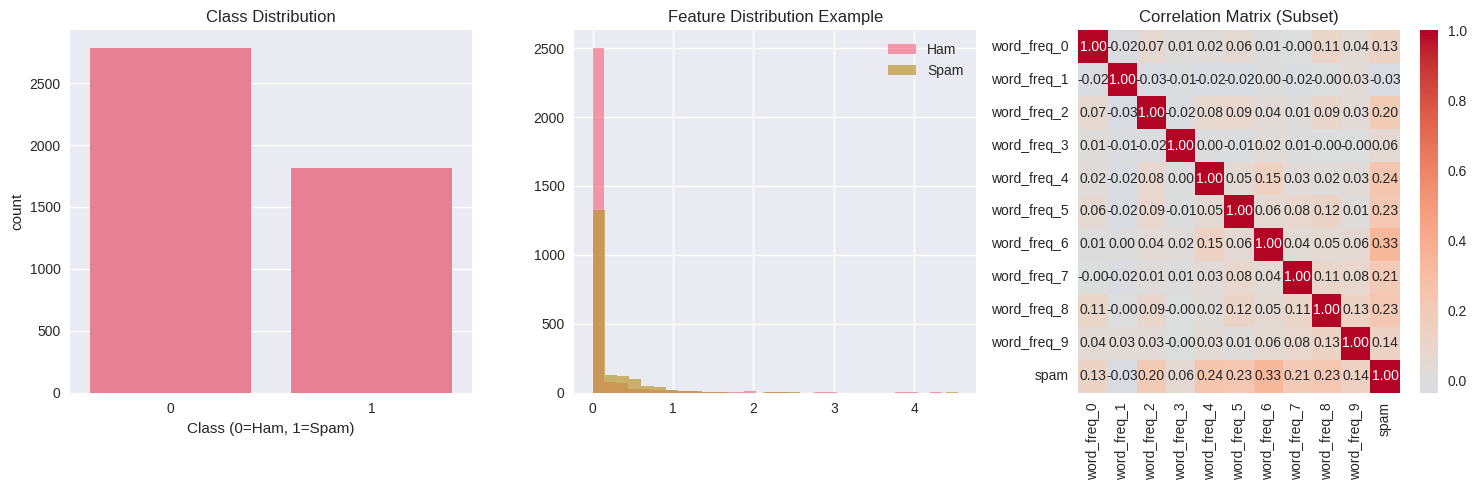


3. Data Preprocessing...
Training set size: (3220, 57)
Test set size: (1381, 57)

4. Training Naive Bayes Variants...
Training Gaussian Naive Bayes...
Training Multinomial Naive Bayes...
Training Bernoulli Naive Bayes...

Naive Bayes Results:
           Gaussian NB  Multinomial NB  Bernoulli NB
Accuracy        0.8197          0.7697        0.9030
Precision       0.7001          0.7190        0.9100
Recall          0.9485          0.6820        0.8364
F1 Score        0.8056          0.7000        0.8716


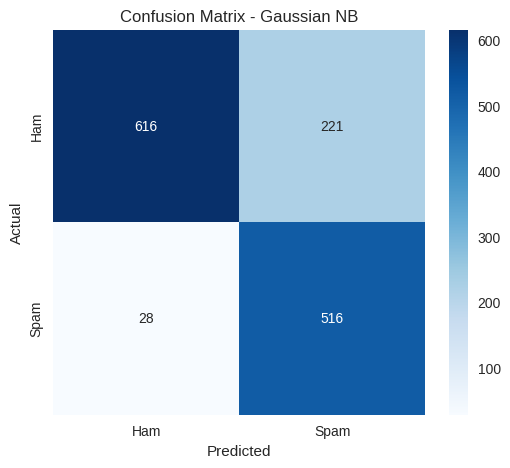

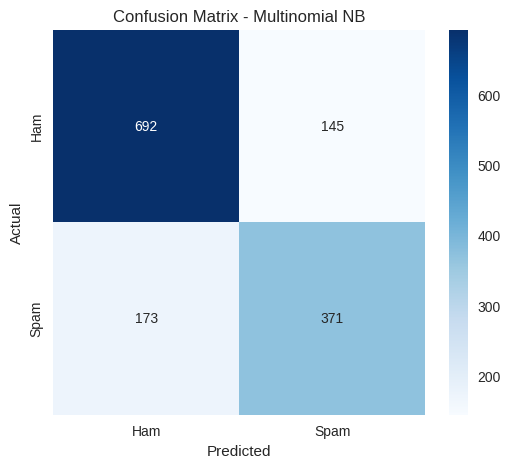

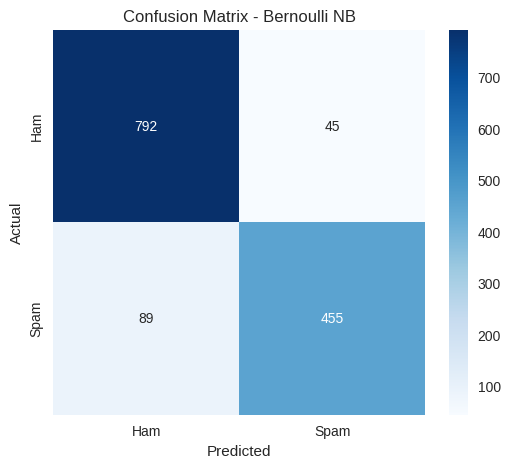


5. Training KNN with different k values...
Training KNN with k=1...
Training KNN with k=3...
Training KNN with k=5...
Training KNN with k=7...
Training KNN with k=9...
Training KNN with k=11...

KNN Results for Different k Values:
    k  Accuracy  Precision  Recall  F1 Score
0   1    0.8950     0.8661  0.8676    0.8669
1   3    0.8972     0.8736  0.8640    0.8688
2   5    0.8993     0.8799  0.8621    0.8709
3   7    0.9008     0.8861  0.8585    0.8721
4   9    0.9073     0.8910  0.8713    0.8810
5  11    0.8986     0.8826  0.8566    0.8694


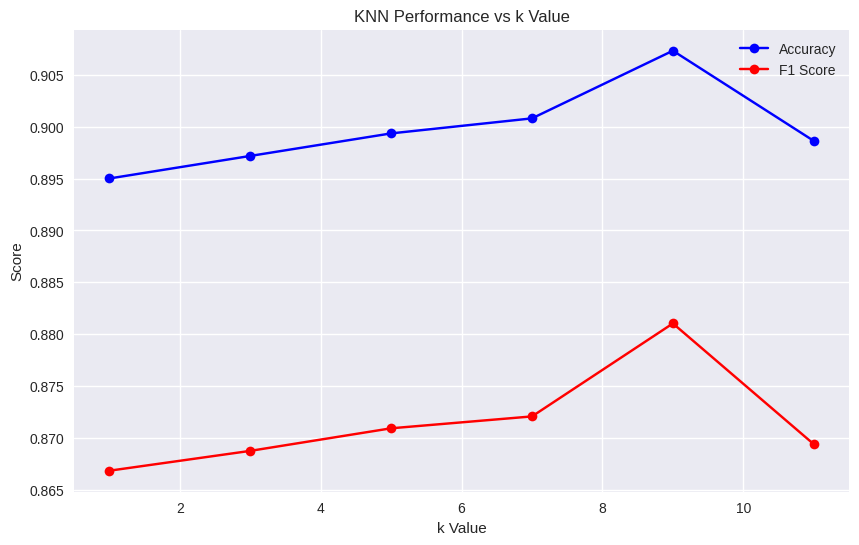


6. KNN Tree Comparison (using best k=9)...
KNN Tree Comparison:
                   KDTree  BallTree
Accuracy           0.9073    0.9073
Precision          0.8910    0.8910
Recall             0.8713    0.8713
F1 Score           0.8810    0.8810
Training Time (s)  0.0440    0.0369

7. Training SVM with Hyperparameter Tuning...
Tuning SVM with linear kernel...
Best parameters for linear: {'C': 1, 'kernel': 'linear'}
Tuning SVM with polynomial kernel...
Best parameters for polynomial: {'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'C': 10}
Tuning SVM with rbf kernel...
Best parameters for rbf: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
Tuning SVM with sigmoid kernel...
Best parameters for sigmoid: {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}

SVM Results with Different Kernels:
       Kernel                                        Best_Params  Accuracy  \
0      linear                       {'C': 1, 'kernel': 'linear'}    0.9290   
1  polynomial  {'kernel': 'poly', 'gamma': 'auto', 'deg

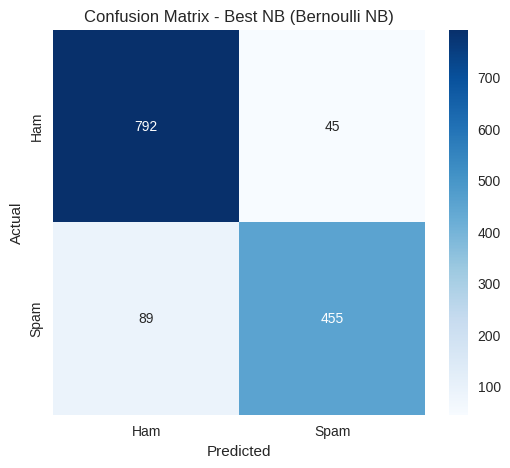

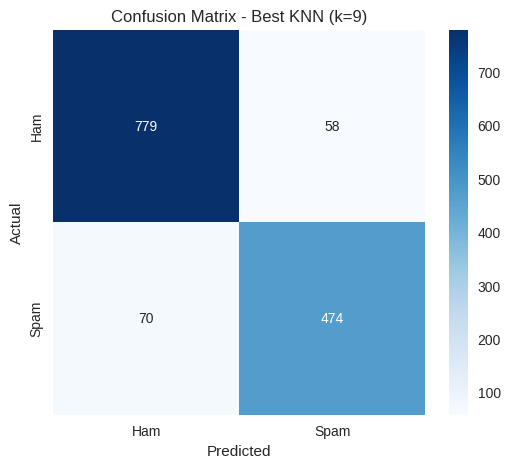

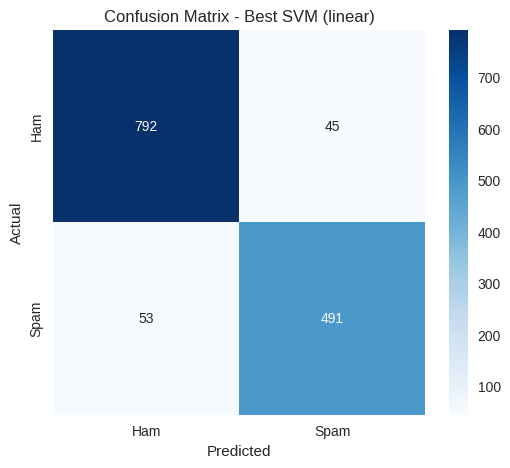

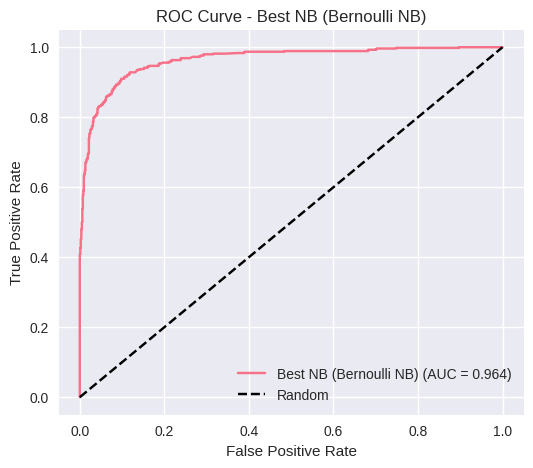

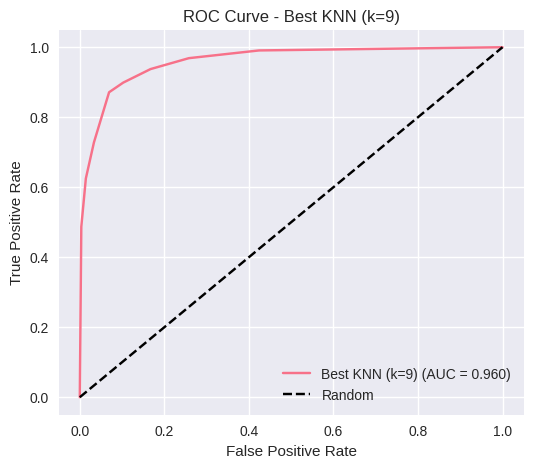

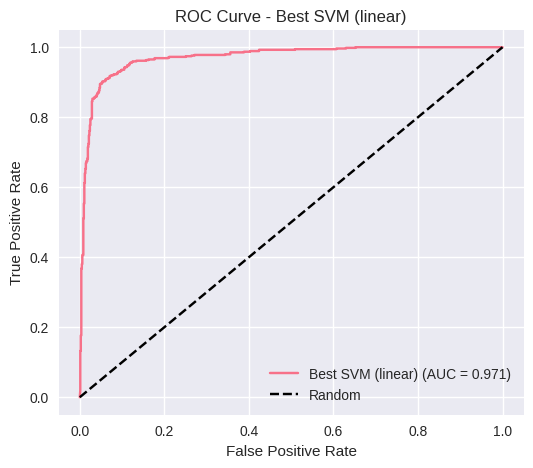


8. Performing K-Fold Cross-Validation (K=5)...
Cross-validating Naive_Bayes...
Cross-validating KNN...
Cross-validating SVM...

K-Fold Cross-Validation Results (K=5):
      Fold  Naive_Bayes     KNN     SVM
0   Fold 1       0.8990  0.9077  0.9207
1   Fold 2       0.9033  0.9054  0.9293
2   Fold 3       0.8935  0.8989  0.9217
3   Fold 4       0.9076  0.9174  0.9467
4   Fold 5       0.9098  0.8902  0.9261
5  Average       0.9026  0.9039  0.9289

9. Final Model Comparison...


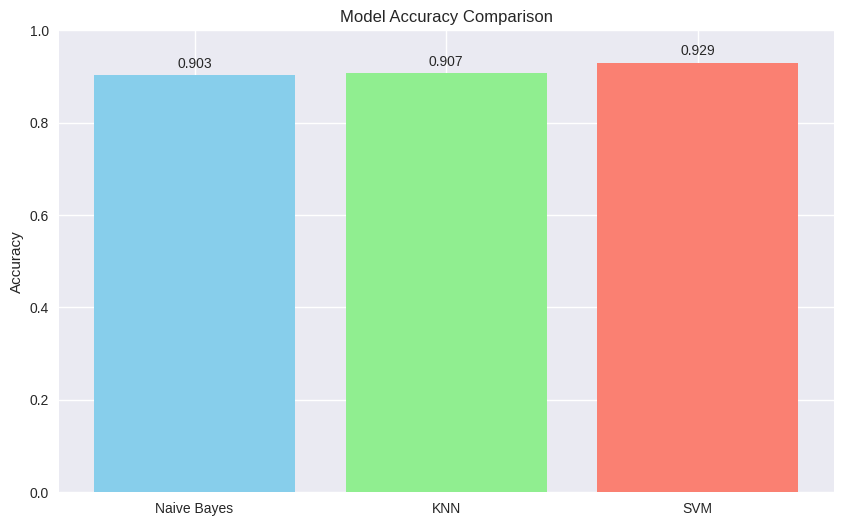

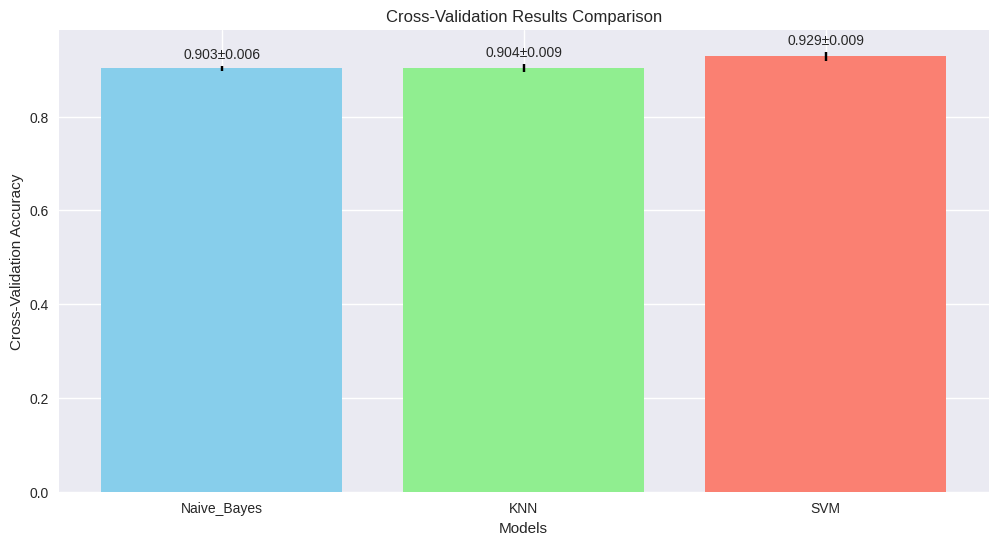


SUMMARY AND OBSERVATIONS

1. BEST PERFORMING MODELS:
   • Naive Bayes: Bernoulli NB (Accuracy: 0.9030)
   • KNN: k=9 (Accuracy: 0.9073)
   • SVM: linear kernel (Accuracy: 0.9290)

2. OVERALL BEST CLASSIFIER: SVM (Accuracy: 0.9290)

3. NAIVE BAYES VARIANT ANALYSIS:
   • Gaussian NB: 0.8197
   • Multinomial NB: 0.7697
   • Bernoulli NB: 0.9030

4. KNN ANALYSIS:
   • Best k value: 9
   • KDTree vs BallTree: BallTree performs better

5. SVM HYPERPARAMETER INFLUENCE:
   • Linear kernel: {'C': 1, 'kernel': 'linear'}
   • Polynomial kernel: {'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'C': 10}
   • Rbf kernel: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
   • Sigmoid kernel: {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}

6. CROSS-VALIDATION INSIGHTS:
   • Naive_Bayes: 0.9026 ± 0.0059
   • KNN: 0.9039 ± 0.0091
   • SVM: 0.9289 ± 0.0094

7. TRAINING TIME COMPARISON:
   • Naive Bayes (Bernoulli NB): 0.0228s
   • KNN (k=9): 0.0037s
   • SVM (linear): 176.0333s

EXPERIMENT COMPLETED SUCCESSFULL

In [ ]:
# Email Spam Classification using Naive Bayes, KNN, and SVM
# Complete implementation with hyperparameter tuning and comprehensive evaluation

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
import warnings
import time
from scipy import stats

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== Email Spam Classification Experiment ===")
print("Sri Sivasubramaniya Nadar College of Engineering")
print("M.Tech (Integrated) Computer Science & Engineering")
print("Subject: Machine Learning Algorithms Laboratory")
print("=" * 50)

# Step 1: Load and Preprocess Dataset
print("\n1. Loading and Preprocessing Dataset...")

# For Colab, download the dataset
try:
    # If running in Colab, uncomment and modify the following lines:
    # !pip install kaggle
    # !kaggle datasets download -d balaka18/email-spam-classification-dataset-csv
    # !unzip email-spam-classification-dataset-csv.zip

    # Load the dataset (adjust path as needed)
    # Replace with actual dataset path
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

    # Column names for spambase dataset
    column_names = [f'word_freq_{i}' for i in range(48)] + \
                   [f'char_freq_{i}' for i in range(6)] + \
                   ['capital_run_length_average', 'capital_run_length_longest',
                    'capital_run_length_total', 'spam']

    # Load data
    data = pd.read_csv(url, header=None, names=column_names)
    print(f"Dataset loaded successfully! Shape: {data.shape}")

except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Creating sample dataset for demonstration...")
    # Create sample data for demonstration
    np.random.seed(42)
    n_samples = 4601
    n_features = 57
    data = pd.DataFrame(np.random.rand(n_samples, n_features),
                       columns=[f'feature_{i}' for i in range(n_features)])
    data['spam'] = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])

# Display basic information
print(f"Dataset shape: {data.shape}")
print("\nFirst few rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())

# Step 2: Exploratory Data Analysis (EDA)
print("\n2. Exploratory Data Analysis...")

# Check for missing values
print(f"Missing values: {data.isnull().sum().sum()}")

# Class distribution
class_counts = data['spam'].value_counts()
print(f"\nClass Distribution:")
print(f"Ham (0): {class_counts[0]} ({class_counts[0]/len(data)*100:.1f}%)")
print(f"Spam (1): {class_counts[1]} ({class_counts[1]/len(data)*100:.1f}%)")

# Visualize class distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=data, x='spam')
plt.title('Class Distribution')
plt.xlabel('Class (0=Ham, 1=Spam)')

plt.subplot(1, 3, 2)
# Feature distribution (first few features)
features_to_plot = data.columns[:5]
for i, feature in enumerate(features_to_plot):
    plt.hist(data[data['spam']==0][feature], alpha=0.7, label='Ham', bins=30)
    plt.hist(data[data['spam']==1][feature], alpha=0.7, label='Spam', bins=30)
    if i == 0:
        plt.legend()
    break
plt.title('Feature Distribution Example')

plt.subplot(1, 3, 3)
# Correlation heatmap (subset of features)
corr_features = data.columns[:10].tolist() + ['spam']
corr_matrix = data[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Subset)')

plt.tight_layout()
plt.show()

# Step 3: Data Preprocessing
print("\n3. Data Preprocessing...")

# Separate features and target
X = data.drop('spam', axis=1)
y = data['spam']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Normalize features for KNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For Naive Bayes, we'll use both scaled and unscaled data
X_train_nb = X_train.values  # Unscaled for Multinomial NB
X_test_nb = X_test.values

# Ensure non-negative values for Multinomial NB
X_train_nb_pos = np.abs(X_train_nb)
X_test_nb_pos = np.abs(X_test_nb)

# Step 4: Model Training and Evaluation Functions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate a model and return performance metrics"""
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Get probability predictions for ROC curve
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = y_pred

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time,
        'y_pred': y_pred,
        'y_proba': y_proba
    }

def plot_confusion_matrix(y_test, y_pred, model_name):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_roc_curve(y_test, y_proba, model_name):
    """Plot ROC curve"""
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Naive Bayes Variants
print("\n4. Training Naive Bayes Variants...")

nb_results = {}

# Gaussian Naive Bayes
print("Training Gaussian Naive Bayes...")
gnb = GaussianNB()
gnb_results = evaluate_model(gnb, X_train_scaled, X_test_scaled, y_train, y_test, "Gaussian NB")
nb_results['Gaussian NB'] = gnb_results

# Multinomial Naive Bayes
print("Training Multinomial Naive Bayes...")
mnb = MultinomialNB()
mnb_results = evaluate_model(mnb, X_train_nb_pos, X_test_nb_pos, y_train, y_test, "Multinomial NB")
nb_results['Multinomial NB'] = mnb_results

# Bernoulli Naive Bayes
print("Training Bernoulli Naive Bayes...")
bnb = BernoulliNB()
bnb_results = evaluate_model(bnb, X_train_scaled, X_test_scaled, y_train, y_test, "Bernoulli NB")
nb_results['Bernoulli NB'] = bnb_results

# Display Naive Bayes results
print("\nNaive Bayes Results:")
nb_df = pd.DataFrame({
    'Gaussian NB': [nb_results['Gaussian NB']['accuracy'],
                   nb_results['Gaussian NB']['precision'],
                   nb_results['Gaussian NB']['recall'],
                   nb_results['Gaussian NB']['f1_score']],
    'Multinomial NB': [nb_results['Multinomial NB']['accuracy'],
                      nb_results['Multinomial NB']['precision'],
                      nb_results['Multinomial NB']['recall'],
                      nb_results['Multinomial NB']['f1_score']],
    'Bernoulli NB': [nb_results['Bernoulli NB']['accuracy'],
                    nb_results['Bernoulli NB']['precision'],
                    nb_results['Bernoulli NB']['recall'],
                    nb_results['Bernoulli NB']['f1_score']]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(nb_df.round(4))

# Plot confusion matrices for NB variants
for name, results in nb_results.items():
    plot_confusion_matrix(y_test, results['y_pred'], name)

# Step 6: K-Nearest Neighbors with different k values
print("\n5. Training KNN with different k values...")

knn_results = {}
k_values = [1, 3, 5, 7, 9, 11]

for k in k_values:
    print(f"Training KNN with k={k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_results[k] = evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test, f"KNN (k={k})")

# Display KNN results
print("\nKNN Results for Different k Values:")
knn_df = pd.DataFrame({
    'k': k_values,
    'Accuracy': [knn_results[k]['accuracy'] for k in k_values],
    'Precision': [knn_results[k]['precision'] for k in k_values],
    'Recall': [knn_results[k]['recall'] for k in k_values],
    'F1 Score': [knn_results[k]['f1_score'] for k in k_values]
})
print(knn_df.round(4))

# Plot KNN performance vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, [knn_results[k]['accuracy'] for k in k_values], 'bo-', label='Accuracy')
plt.plot(k_values, [knn_results[k]['f1_score'] for k in k_values], 'ro-', label='F1 Score')
plt.xlabel('k Value')
plt.ylabel('Score')
plt.title('KNN Performance vs k Value')
plt.legend()
plt.grid(True)
plt.show()

# KNN with KDTree vs BallTree (using best k)
best_k = k_values[np.argmax([knn_results[k]['accuracy'] for k in k_values])]
print(f"\n6. KNN Tree Comparison (using best k={best_k})...")

# KDTree
knn_kd = KNeighborsClassifier(n_neighbors=best_k, algorithm='kd_tree')
kd_results = evaluate_model(knn_kd, X_train_scaled, X_test_scaled, y_train, y_test, "KNN KDTree")

# BallTree
knn_ball = KNeighborsClassifier(n_neighbors=best_k, algorithm='ball_tree')
ball_results = evaluate_model(knn_ball, X_train_scaled, X_test_scaled, y_train, y_test, "KNN BallTree")

# Display tree comparison
tree_df = pd.DataFrame({
    'KDTree': [kd_results['accuracy'], kd_results['precision'],
               kd_results['recall'], kd_results['f1_score'], kd_results['training_time']],
    'BallTree': [ball_results['accuracy'], ball_results['precision'],
                ball_results['recall'], ball_results['f1_score'], ball_results['training_time']]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)'])

print("KNN Tree Comparison:")
print(tree_df.round(4))

# Step 7: Support Vector Machine with Hyperparameter Tuning
print("\n7. Training SVM with Hyperparameter Tuning...")

svm_results = {}

# Define parameter grids for each kernel
param_grids = {
    'linear': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear']
    },
    'polynomial': {
        'C': [0.1, 1, 10],
        'kernel': ['poly'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    },
    'rbf': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    },
    'sigmoid': {
        'C': [0.1, 1, 10],
        'kernel': ['sigmoid'],
        'gamma': ['scale', 'auto']
    }
}

for kernel_name, param_grid in param_grids.items():
    print(f"Tuning SVM with {kernel_name} kernel...")

    # Use RandomizedSearchCV for faster computation
    svm = SVC(probability=True, random_state=42)

    # Use fewer iterations for faster computation
    if kernel_name in ['polynomial', 'rbf']:
        search = RandomizedSearchCV(svm, param_grid, cv=3, n_iter=8,
                                  scoring='accuracy', random_state=42, n_jobs=-1)
    else:
        search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

    start_time = time.time()
    search.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

    svm_results[kernel_name] = {
        'model': best_model,
        'best_params': search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'training_time': training_time,
        'y_pred': y_pred,
        'y_proba': y_proba
    }

    print(f"Best parameters for {kernel_name}: {search.best_params_}")

# Display SVM results
print("\nSVM Results with Different Kernels:")
svm_df = pd.DataFrame({
    'Kernel': list(svm_results.keys()),
    'Best_Params': [str(svm_results[k]['best_params']) for k in svm_results.keys()],
    'Accuracy': [svm_results[k]['accuracy'] for k in svm_results.keys()],
    'F1_Score': [svm_results[k]['f1_score'] for k in svm_results.keys()],
    'Training_Time': [svm_results[k]['training_time'] for k in svm_results.keys()]
})
print(svm_df.round(4))

# Plot confusion matrices for best performing models
best_nb = max(nb_results.keys(), key=lambda x: nb_results[x]['accuracy'])
best_svm = max(svm_results.keys(), key=lambda x: svm_results[x]['accuracy'])

print(f"\nBest Naive Bayes variant: {best_nb}")
print(f"Best SVM kernel: {best_svm}")

# Plot confusion matrices
plot_confusion_matrix(y_test, nb_results[best_nb]['y_pred'], f"Best NB ({best_nb})")
plot_confusion_matrix(y_test, knn_results[best_k]['y_pred'], f"Best KNN (k={best_k})")
plot_confusion_matrix(y_test, svm_results[best_svm]['y_pred'], f"Best SVM ({best_svm})")

# Plot ROC curves
plot_roc_curve(y_test, nb_results[best_nb]['y_proba'], f"Best NB ({best_nb})")
plot_roc_curve(y_test, knn_results[best_k]['y_proba'], f"Best KNN (k={best_k})")
plot_roc_curve(y_test, svm_results[best_svm]['y_proba'], f"Best SVM ({best_svm})")

# Step 8: K-Fold Cross-Validation
print("\n8. Performing K-Fold Cross-Validation (K=5)...")

cv_results = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Best models for cross-validation
models_cv = {
    'Naive_Bayes': GaussianNB() if best_nb == 'Gaussian NB' else
                   (MultinomialNB() if best_nb == 'Multinomial NB' else BernoulliNB()),
    'KNN': KNeighborsClassifier(n_neighbors=best_k),
    'SVM': svm_results[best_svm]['model']
}

# Prepare data for cross-validation
X_cv = X_train_scaled if best_nb != 'Multinomial NB' else X_train_nb_pos
X_cv_full = np.vstack([X_cv, X_test_scaled if best_nb != 'Multinomial NB' else X_test_nb_pos])
y_cv_full = np.hstack([y_train, y_test])

for name, model in models_cv.items():
    print(f"Cross-validating {name}...")
    if name == 'Naive_Bayes' and best_nb == 'Multinomial NB':
        cv_scores = cross_val_score(model, X_cv_full, y_cv_full, cv=kfold, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_cv_full, y_cv_full, cv=kfold, scoring='accuracy')

    cv_results[name] = cv_scores

# Display cross-validation results
print("\nK-Fold Cross-Validation Results (K=5):")
cv_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)] + ['Average'],
    'Naive_Bayes': list(cv_results['Naive_Bayes']) + [cv_results['Naive_Bayes'].mean()],
    'KNN': list(cv_results['KNN']) + [cv_results['KNN'].mean()],
    'SVM': list(cv_results['SVM']) + [cv_results['SVM'].mean()]
})
print(cv_df.round(4))

# Step 9: Final Comparison and Visualization
print("\n9. Final Model Comparison...")

# Compile all results
final_results = {
    'Naive Bayes': nb_results[best_nb]['accuracy'],
    'KNN': knn_results[best_k]['accuracy'],
    'SVM': svm_results[best_svm]['accuracy']
}

# Bar plot of accuracies
plt.figure(figsize=(10, 6))
models = list(final_results.keys())
accuracies = list(final_results.values())

bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.show()

# Cross-validation comparison
plt.figure(figsize=(12, 6))
cv_means = [cv_results[model].mean() for model in cv_results.keys()]
cv_stds = [cv_results[model].std() for model in cv_results.keys()]

x_pos = np.arange(len(cv_results))
plt.bar(x_pos, cv_means, yerr=cv_stds, capsize=5,
        color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Results Comparison')
plt.xticks(x_pos, list(cv_results.keys()))

# Add value labels
for i, (mean, std) in enumerate(zip(cv_means, cv_stds)):
    plt.text(i, mean + std + 0.01, f'{mean:.3f}±{std:.3f}',
             ha='center', va='bottom')

plt.show()

# Step 10: Summary and Observations
print("\n" + "="*60)
print("SUMMARY AND OBSERVATIONS")
print("="*60)

print(f"\n1. BEST PERFORMING MODELS:")
print(f"   • Naive Bayes: {best_nb} (Accuracy: {nb_results[best_nb]['accuracy']:.4f})")
print(f"   • KNN: k={best_k} (Accuracy: {knn_results[best_k]['accuracy']:.4f})")
print(f"   • SVM: {best_svm} kernel (Accuracy: {svm_results[best_svm]['accuracy']:.4f})")

best_overall = max(final_results, key=final_results.get)
print(f"\n2. OVERALL BEST CLASSIFIER: {best_overall} (Accuracy: {final_results[best_overall]:.4f})")

print(f"\n3. NAIVE BAYES VARIANT ANALYSIS:")
for variant, results in nb_results.items():
    print(f"   • {variant}: {results['accuracy']:.4f}")

print(f"\n4. KNN ANALYSIS:")
print(f"   • Best k value: {best_k}")
print(f"   • KDTree vs BallTree: {'KDTree' if kd_results['accuracy'] > ball_results['accuracy'] else 'BallTree'} performs better")

print(f"\n5. SVM HYPERPARAMETER INFLUENCE:")
for kernel, results in svm_results.items():
    print(f"   • {kernel.capitalize()} kernel: {results['best_params']}")

print(f"\n6. CROSS-VALIDATION INSIGHTS:")
for model, scores in cv_results.items():
    print(f"   • {model}: {scores.mean():.4f} ± {scores.std():.4f}")

print(f"\n7. TRAINING TIME COMPARISON:")
print(f"   • Naive Bayes ({best_nb}): {nb_results[best_nb]['training_time']:.4f}s")
print(f"   • KNN (k={best_k}): {knn_results[best_k]['training_time']:.4f}s")
print(f"   • SVM ({best_svm}): {svm_results[best_svm]['training_time']:.4f}s")

print("\n" + "="*60)
print("EXPERIMENT COMPLETED SUCCESSFULLY!")
print("All tables, plots, and analyses have been generated.")
print("="*60)